# Salient Region Detector example

This notebook shows how to use the main functionality of the `salientregions` package, namely the SalientDetector.

In [1]:
import numpy as np
import cv2
import sys
import os
sys.path.insert(0, os.path.abspath('..'))

import salientregions as sr

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


First, we load the image and show it.

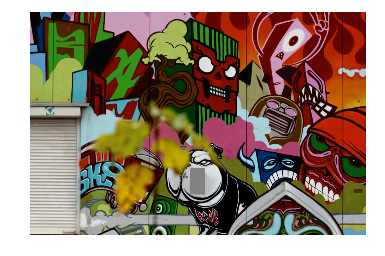

In [4]:
#Load the image
path_to_image = 'images/graffiti.jpg'
img = cv2.imread(path_to_image)
sr.show_image(img)

Now we create a SalientDetector object, with some parameters.

In [5]:
det = sr.SalientDetector(SE_size_factor=0.20,
                                lam_factor=4)

We ask the SalientDetector to detect all types of regions:

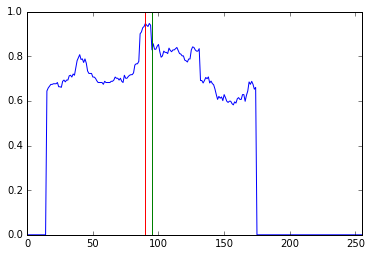

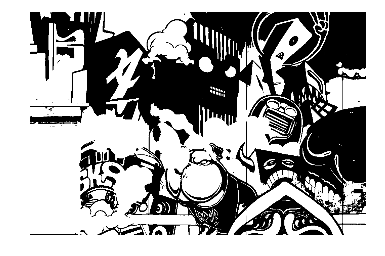

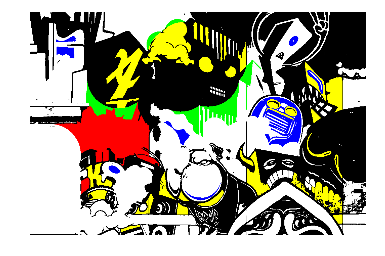

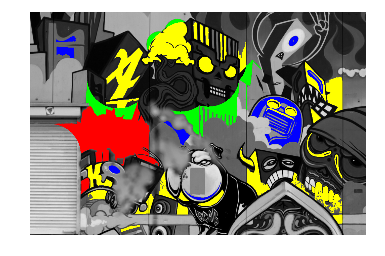

['indentations', 'islands', 'holes', 'protrusions']


In [6]:
regions = det.detect(img,
                    find_holes=True,
                    find_islands=True,
                    find_indentations=True,
                    find_protrusions=True, 
                    visualize=True)
print regions.keys()

We can also output the regions as ellipses

In [26]:
#TODO: there is still a bug in this function
#num_regions, features = sr.binary_mask2ellipse_features(regions)